In [15]:
import pynucastro as pyna
from pynucastro.networks import StarKillerNetwork

library_file = "/Users/sailor/Desktop/asro_work/git_fun/xinlong_file/pynucastro_beifen/library/20180319default2"
mylibrary = pyna.rates.Library(library_file)

data_list = mylibrary.get_rates()

all_nuclei = ["p","he4","ne20","o20","f20","mg24","al27","o16","si28","s32","p31"]

escn_library = mylibrary.linking_nuclei(all_nuclei,with_reverse=True)
escn_tabular = ["f20--o20-toki","ne20--f20-toki","o20--f20-toki","f20--ne20-toki"]

In [16]:
#rc = pyna.RateCollection(libraries=[escn_library],rate_files=escn_tabular)
rc = pyna.RateCollection(libraries=[escn_library])

comp = pyna.Composition(rc.get_nuclei())
comp.set_nuc("o16", 0.5)
comp.set_nuc("ne20", 0.3)
comp.set_nuc("mg24", 0.1)
comp.set_nuc("o20", 1.e-5)
comp.set_nuc("f20", 1.e-5)
comp.set_nuc("p", 1.e-5)
comp.set_nuc("he4", 1.e-2)
comp.set_nuc("al27", 1.e-2)
comp.set_nuc("si28", 1.e-2)
comp.set_nuc("s32", 1.e-2)
comp.set_nuc("p31", 1.e-2)
comp.normalize()

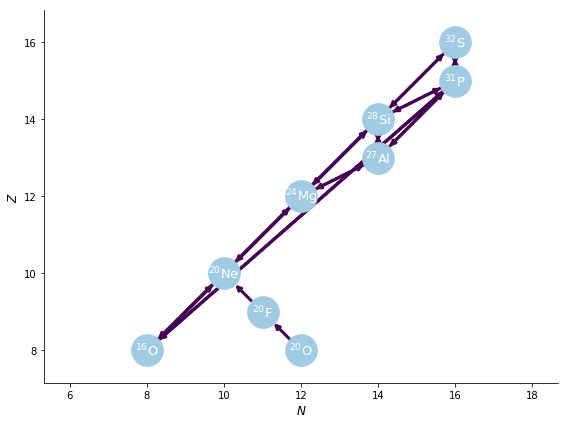

In [17]:
rc.plot(outfile="ecsn.png", T=1.e9, comp=comp)

In [18]:
new_rate_list = []
ydots = rc.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)
for rate in rc.rates:
    #if ydots[rate] >= 1.e-20 and rate.weak == False:
    if rate.weak == False:
        new_rate_list.append(rate)

        
rc_new = pyna.RateCollection(rates=new_rate_list, rate_files=escn_tabular)

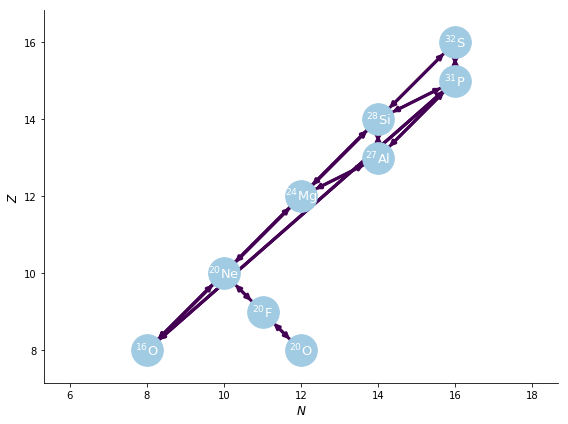

In [19]:
rc_new.plot(outfile="ecsn1.png", T=1.e9, comp=comp)

In [20]:
rc_new.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)

OrderedDict([(ne20 --> he4 + o16, 4.6316695198155011e-18),
             (mg24 --> he4 + ne20, 4.7447900376058227e-42),
             (si28 --> p + al27, 2.2702059658516468e-49),
             (si28 --> he4 + mg24, 9.1781555059816296e-47),
             (p31 --> he4 + al27, 9.7597296103699203e-47),
             (s32 --> p + p31, 2.5042620750581571e-36),
             (s32 --> he4 + si28, 2.4655741369058092e-33),
             (o16 + he4 --> ne20, 2163.4896055892013),
             (ne20 + he4 --> mg24, 470.46571662959479),
             (mg24 + he4 --> si28, 65.334259254490874),
             (al27 + p --> si28, 3786.5889540808494),
             (al27 + he4 --> p31, 0.057635811259143355),
             (si28 + he4 --> s32, 0.083227386105696174),
             (p31 + p --> s32, 2375.1304964039132),
             (o16 + o16 --> p + p31, 7.1549398954639525e-17),
             (o16 + o16 --> he4 + si28, 2.5949312230335836e-17),
             (mg24 + he4 --> p + al27, 0.2543862399303774),
             (a

In [21]:
rc.evaluate_rates(rho=7.e9, T=1.e9, composition=comp)

OrderedDict([(o20 --> f20, 2.702249897457067e-08),
             (f20 --> ne20, 3.2865051027731968e-08),
             (ne20 --> he4 + o16, 4.6316695198155011e-18),
             (mg24 --> he4 + ne20, 4.7447900376058227e-42),
             (si28 --> p + al27, 2.2702059658516468e-49),
             (si28 --> he4 + mg24, 9.1781555059816296e-47),
             (p31 --> he4 + al27, 9.7597296103699203e-47),
             (s32 --> p + p31, 2.5042620750581571e-36),
             (s32 --> he4 + si28, 2.4655741369058092e-33),
             (o16 + he4 --> ne20, 2163.4896055892013),
             (ne20 + he4 --> mg24, 470.46571662959479),
             (mg24 + he4 --> si28, 65.334259254490874),
             (al27 + p --> si28, 3786.5889540808494),
             (al27 + he4 --> p31, 0.057635811259143355),
             (si28 + he4 --> s32, 0.083227386105696174),
             (p31 + p --> s32, 2375.1304964039132),
             (o16 + o16 --> p + p31, 7.1549398954639525e-17),
             (o16 + o16 --> he4 + si

In [22]:
wd_net = StarKillerNetwork(rates=new_rate_list, rate_files=escn_tabular)

In [23]:
wd_net.rates

[ne20 --> he4 + o16,
 mg24 --> he4 + ne20,
 si28 --> p + al27,
 si28 --> he4 + mg24,
 p31 --> he4 + al27,
 s32 --> p + p31,
 s32 --> he4 + si28,
 o16 + he4 --> ne20,
 ne20 + he4 --> mg24,
 mg24 + he4 --> si28,
 al27 + p --> si28,
 al27 + he4 --> p31,
 si28 + he4 --> s32,
 p31 + p --> s32,
 o16 + o16 --> p + p31,
 o16 + o16 --> he4 + si28,
 mg24 + he4 --> p + al27,
 al27 + p --> he4 + mg24,
 si28 + he4 --> p + p31,
 si28 + he4 --> o16 + o16,
 p31 + p --> he4 + si28,
 p31 + p --> o16 + o16,
 f20 --> o20,
 ne20 --> f20,
 o20 --> f20,
 f20 --> ne20]

In [24]:
len(wd_net.rates)

26

In [25]:
len(rc_new.rates)

26

In [12]:
wd_net.write_network(use_cse=True)